In [ ]:
import numpy as np
import pandas as pd
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt



In [ ]:
class NeuralNet():
    '''
    A two layer neural network
    '''
        
    def __init__(self, layers=[10,10,1], learning_rate=0.001, iterations=100):
        self.params = {}
        self.learning_rate = learning_rate
        self.iterations = iterations
        self.loss = []
        self.sample_size = None
        self.layers = layers
        self.X = None
        self.y = None
        self.loss = []
        self.epochs = []
                
    def init_weights(self):
        '''
        Initialize the weights from a random normal distribution
        '''
        np.random.seed(1) # Seed the random number generator
        self.params["W1"] = np.random.randn(self.layers[0], self.layers[1]) 
        self.params['b1']  =np.random.randn(self.layers[1],1)
        self.params['W2'] = np.random.randn(self.layers[1],self.layers[2]) 
        self.params['b2'] = np.random.randn(self.layers[2],1)
         
    def relu(self,Z):
        '''
        The ReLu activation function is to performs a threshold
        operation to each input element where values less 
        than zero are set to zero.
        '''
        return np.maximum(0,Z)

    def dRelu(self, x):
        x[x<=0] = 0
        x[x>0] = 1
        return x

    def eta(self, x):
      ETA = 0.0000000001
      return np.maximum(x, ETA)


    def sigmoid(self,Z):
        
        return 1/(1+np.exp(-Z))

    def entropy_loss(self,y, yhat):
        nsample = len(y)
        yhat_inv = 1.0 - yhat
        y_inv = 1.0 - y
        yhat = self.eta(yhat) ## clips value to avoid NaNs in log
        yhat_inv = self.eta(yhat_inv) 
        loss = -1/nsample * (np.sum(np.multiply(np.log(yhat), y) + np.multiply((y_inv), np.log(yhat_inv))))
        return loss

    def forward_propagation(self):
        
        Z1 = self.params['W1'].T.dot(self.X.T) + self.params['b1']
        A1 = self.relu(Z1)
        Z2 = self.params['W2'].T.dot(A1) + self.params['b2']
        A2 = self.sigmoid(Z2)
        
        yhat = self.sigmoid(Z2) #A2 = yhat
        loss = self.entropy_loss(self.y,yhat)
        # save calculated parameters     
        self.params['Z1'] = Z1
        self.params['Z2'] = Z2
        self.params['A1'] = A1
       # return Z1, A1, Z2, A2
        return yhat,loss


    def ReLU_deriv(self,Z):
        return Z > 0    

    def back_propagation(self,yhat):
        '''
        Computes the derivatives and update weights and bias according.
        '''
        m = 10

        
        one_hot_Y = self.y     #(1022,1)
        A2 = self.sigmoid(self.params['Z2']) # A2-dim = (10,1022)
        A1 = self.relu(self.params['Z1'])    # A1-dim = (10,1022)

        dZ2 = A2 - one_hot_Y #(1,1022)
        dW2 =  dZ2.dot(A1.T) #(1,10) for iteration in GD

        db2 =  np.sum(dZ2)
        dZ1 = self.params['W2'].dot(dZ2) * self.ReLU_deriv(self.params['Z1'])
        dW1 =  dZ1.dot(self.X)
        db1 =  np.sum(dZ1)


        #update the weights and bias
        self.params['W1'] = self.params['W1'] - self.learning_rate * dW1.T
        self.params['W2'] = self.params['W2'] - self.learning_rate * dW2.T
        self.params['b1'] = self.params['b1'] - self.learning_rate * db1
        self.params['b2'] = self.params['b2'] - self.learning_rate * db2

    def fit(self, X, y):
        '''
        Trains the neural network using the specified data and labels
        '''
        self.X = X
        self.y = y
        self.init_weights() #initialize weights and bias

        for i in range(self.iterations):
            yhat, loss = self.forward_propagation()
            self.epochs.append(i+1)
            #print(yhat.shape)
            self.back_propagation(yhat)
            self.loss.append(loss)

    def predict(self, X):
        '''
        Predicts on a test data
        '''
        Z1 = self.params['W1'].T.dot(X.T) + self.params['b1']
        A1 = self.relu(Z1)

        Z2 = (self.params['W2'].T.dot(A1)) + self.params['b2']
        A2 = self.sigmoid(Z2)
        A2 = A2.reshape(X.shape[0],)
        pred_class =[]

        for i in A2:
          if (i<0.5):
            pred_class.append(0)
          else:
            pred_class.append(1)

        return pred_class

    def acc(self, y, yhat):
        '''
        Calculates the accutacy between the predicted valuea and the truth labels
        '''
        acc =0
        for i in range(0,len(y)):
          if y[i] == yhat[i]:
           acc+=1  
        return (acc/len(y))*100
        
    def plot_loss(self):
        '''
        Plots the loss curve
        '''
        plt.plot(self.loss)
        plt.xlabel("epochs")
        plt.ylabel("logloss")
        plt.title("Loss curve for training")
        plt.show()  
    

In [ ]:
df = pd.read_csv("/content/drive/MyDrive/ELL409/Assignment-3/housepricedata.csv")


0        8450
1        9600
2       11250
3        9550
4       14260
        ...  
1455     7917
1456    13175
1457     9042
1458     9717
1459     9937
Name: LotArea, Length: 1460, dtype: int64

In [ ]:
dataset = df.values

X = dataset[:,0:10]
Y = dataset[:,10]

min_max_scaler = preprocessing.MinMaxScaler()
X_scale = min_max_scaler.fit_transform(X)

In [ ]:
X_train, X_val_and_test, Y_train, Y_val_and_test = train_test_split(X_scale, Y, test_size=0.3)

X_val, X_test, Y_val, Y_test = train_test_split(X_val_and_test, Y_val_and_test, test_size=0.5)

In [ ]:
print(X_train.shape, X_val.shape, X_test.shape, Y_train.shape, Y_val.shape, Y_test.shape)

(1022, 10) (219, 10) (219, 10) (1022,) (219,) (219,)


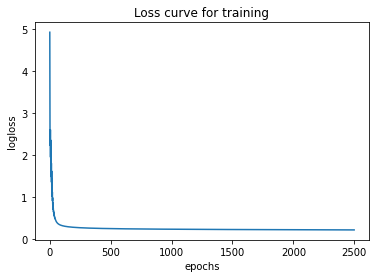

91.32420091324201

In [ ]:
nn  = NeuralNet([10,100,1], learning_rate=0.0001, iterations=2500)

nn.fit(X_train , Y_train)

#nn.predict(X_test)

nn.plot_loss()

yhat = nn.predict(X_test)
nn.acc(Y_test,yhat)




In [ ]:
y_actu = pd.Series(Y_train, name='Actual')
y_pred = pd.Series(yhat, name='Predicted')
df_confusion = pd.crosstab(y_actu, y_pred)
df_confusion

Predicted,0,1
Actual,,
0,47,54
1,56,62
